In [1]:
import os

# 시작 디렉토리를 지정합니다. 필요에 따라 수정하세요.
start_directory = "/content/TryYours-Virtual-Try-On/"

# 찾을 파일명을 지정합니다.
target_file = 'train_dataset'

def find_file(start_dir, target_file):
    for root, dirs, files in os.walk(start_dir):
        if target_file in files:
            return os.path.join(root, target_file)

    return None

file_path = find_file(start_directory, target_file)

if file_path:
    print(f"{target_file} 파일을 다음 경로에서 찾았습니다: {file_path}")
else:
    print(f"{target_file} 파일을 찾을 수 없습니다.")


train_dataset 파일을 찾을 수 없습니다.


# TryYours - High Resolution Virtual Try On site using HR-VITON.
---
Demo for Virtual Try On website

# 1.Setup
- First, in the **Runtime** menu -> **Change runtime type**, make sure to have ```Hardware Accelerator = GPU```
- Clone repo and install dependencies.
- **It will take few minutes to finish installation**

In [2]:
# clone repository
!git clone https://github.com/lastdefiance20/TryYours-Virtual-Try-On

# install dependencies
!pip install tensorboardX av torchgeometry flask flask-ngrok iglovikov_helper_functions cloths_segmentation albumentations
!pip install scipy==1.8.0

%cd TryYours-Virtual-Try-On
# install detectron2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Cloning into 'TryYours-Virtual-Try-On'...
remote: Enumerating objects: 1113, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1113 (delta 4), reused 11 (delta 3), pack-reused 1100
Receiving objects: 100% (1113/1113), 22.21 MiB | 22.03 MiB/s, done.
Resolving deltas: 100% (198/198), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 2. Download Pre-trained Models

In [3]:
!pip install --upgrade --no-cache-dir gdown

%cd HR-VITON-main
!gdown https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&export=download
!gdown https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&export=download
%cd ../

%cd Graphonomy-master
!gdown https://drive.google.com/u/0/uc?id=1eUe18HoH05p0yFUd_sN6GXdTj82aW0m9&export=download
%cd ../

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/content/TryYours-Virtual-Try-On/HR-VITON-main
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy
From (redirected): https://drive.google.com/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&confirm=t&uuid=92dcafb8-7ab3-4047-a657-05e313c4ab2e
To: /content/TryYours-Virtual-Try-On/HR-VITON-main/gen.pth
100% 402M/402M [00:06<00:00, 64.7MB/s]
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ
From (redirected): https://drive.google.com/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&confirm=t&uuid=ae4c8a9c-7d9e-477f-963d-d2bcff48699c
To: /content/TryYours-Virtual-Try-On/HR-VITON-main/mtviton.pth
100% 190M/190M [00:02<00:00, 77.4MB/s]
/content/TryYours-Virtual-Try-On
/content/TryYours-Virtual-Try-On/Graphonomy-master
Downloading...
From (uriginal): https://drive.g

# 3. Upload Cloth Images
Either use sample images or upload other cloth images

In [4]:
import os
import shutil
from google.colab import files

# Uncomment the following block if you would like to upload your own cloth images.

input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.remove(input_dir+'/cloth_web.jpg')
os.rename(input_path, input_dir+'/cloth_web.jpg')


Saving 6.png to 6.png


# 4. Upload Person Images
Either use sample images or upload your images

In [9]:
# Uncomment the following block if you would like to upload your own images.

input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.remove(input_dir+'/origin_web.jpg')
os.rename(input_path, input_dir+'/origin_web.jpg')


Saving 가은2.jpg to 가은2.jpg


# 5. Check Images
check image uploaded successfully

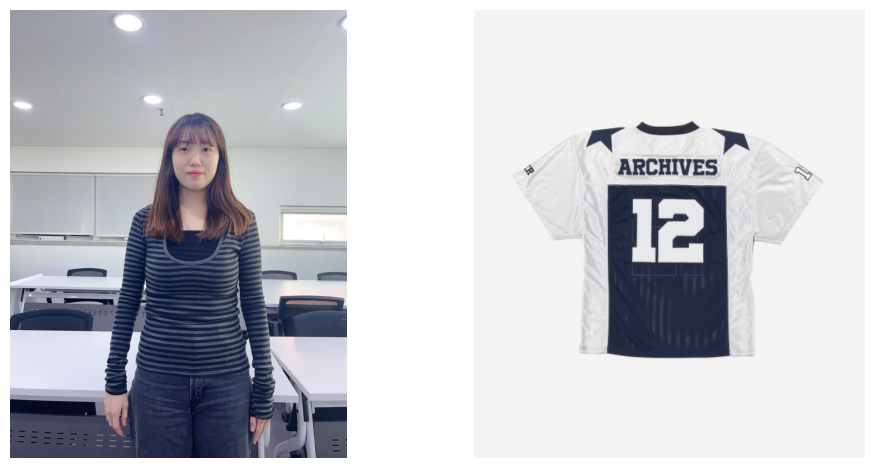

In [10]:
import matplotlib.pyplot as plt
import cv2

original = cv2.cvtColor(cv2.imread("./static/origin_web.jpg"), cv2.COLOR_BGR2RGB)



cloth = cv2.cvtColor(cv2.imread("./static/cloth_web.jpg"), cv2.COLOR_BGR2RGB)
## Display Images
fig, axes = plt.subplots(nrows=1, ncols=2)
dpi = fig.get_dpi()
fig.set_size_inches(900/ dpi, 448 / dpi)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
axes[0].axis('off')
axes[0].imshow(original)
axes[1].axis('off')
axes[1].imshow(cloth)
plt.show()

# 6. RUN CODE
* It will take less than 2 minute
* you can remove background using --background False




In [11]:
!python main.py #--background False

Get mask of cloth

Get openpose coordinate using posenet

Generate semantic segmentation using Graphonomy-Master library

Constructing DeepLabv3+ model...
Number of classes: 20
Output stride: 16
Number of Input Channels: 3
load model: ./inference.pth
time used for the multi-scale image inference is :1.2410835639998368

Generate Densepose image using detectron2 library

[12/28 18:06:06 apply_net]: Loading config from detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml
[12/28 18:06:06 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[12/28 18:06:07 apply_net]: Loading data from origin.jpg
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-

# 7. View Results

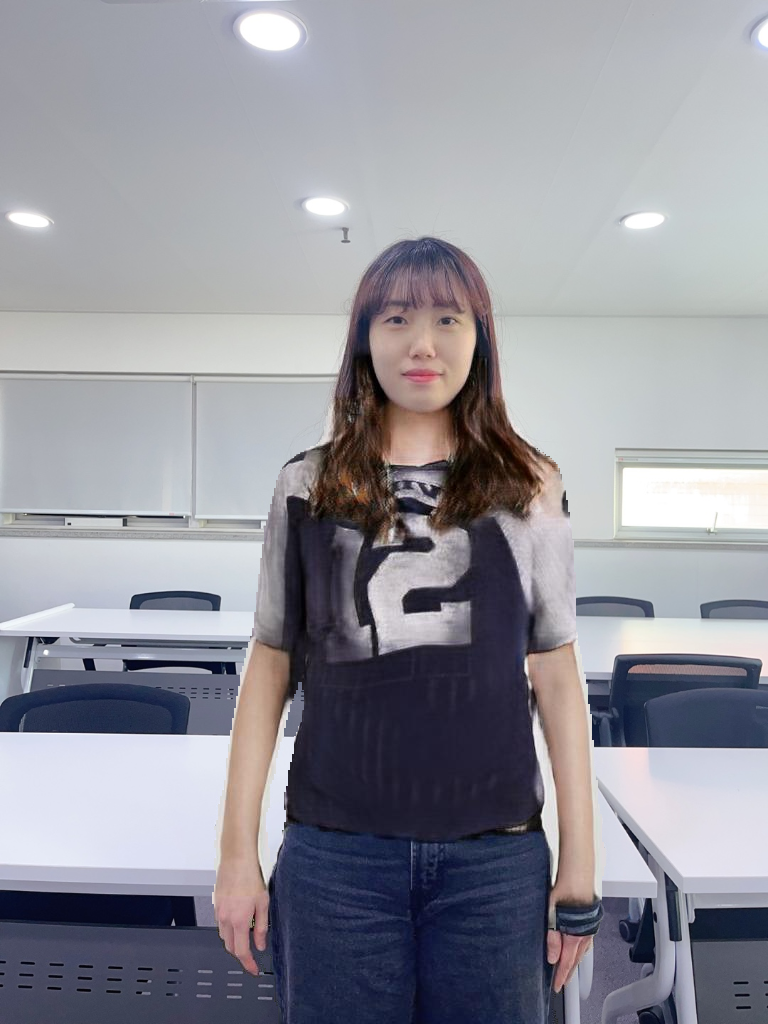

In [12]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename="./static/finalimg.png")
display(image1)